# Energy Usage of Industry in Denmark - Data Processing

This script is preprocessing different data sets for generating input for Balmorel to model industry in higher level of detail.  
Input:
- VMAS-data preprocessed by TIMES-people: 60 industry sector (agg to 13), 24 end-uses (agg to 6), 20 fuels (agg to 13), (ToDo: check if consistent with original data and maybe regather from original data, refer back to DB07)
- Profiles for Electricity Demand (ToDo: do 

### Open Questions
- Which sectors of industry do we look at?

# Script setup

In [2]:
# to show pictures direcly in the code  
%matplotlib inline 

# required packages
import numpy as np
import pandas as pd
import os

In [3]:
# Packages for plotting, not sure if all is really necessary
import matplotlib.pyplot as plt

from bokeh.charts import Bar, output_file, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, NumeralTickFormatter
from bokeh.charts.attributes import color

output_notebook() # another one for plotting graphs are directly plotted in this notebook

Loading BokehJS ...

# VMAS-Data
Danish industrial sectors:
- 57 sectors aggregated to 13 sectors
- 24 end-uses aggregated to 6 end-uses
- 20 fuels aggregated to 13 fuels

Open Questions:
- What does the Group mean?
- Refer back to the original names from DB07, the Dansk Branchecode: Have a translation file for that - simply a csv-file)

In [4]:
vmas = pd.read_excel('input/VMAS_summarized.xlsx', 
                     sheetname='Sheet1',
                     encoding='UTF8',
                     thousands=',',
                     decimals='.',
                     header = 0)

In [5]:
# overview of data
vmas.head()

Industry                           End-use    Fuel     Value  \
0  01 Agriculture  01 Boiler and distribution loses  01 LPG       0.0   
1  01 Agriculture                02 Heating/boiling  01 LPG       0.0   
2  01 Agriculture                         03 Drying  01 LPG  127056.6   
3  01 Agriculture                     04 Dewatering  01 LPG       0.0   
4  01 Agriculture                    05 Destilation  01 LPG       0.0   

     Group                                       Agg Industry  \
0  Group 1  01 Agriculture, forestry, fishing, gravel & stone   
1  Group 1  01 Agriculture, forestry, fishing, gravel & stone   
2  Group 1  01 Agriculture, forestry, fishing, gravel & stone   
3  Group 1  01 Agriculture, forestry, fishing, gravel & stone   
4  Group 1  01 Agriculture, forestry, fishing, gravel & stone   

            Agg End-use Agg Fuel  
0  01 Medium temp. heat   05 LPG  
1  01 Medium temp. heat   05 LPG  
2  01 Medium temp. heat   05 LPG  
3  01 Medium temp. heat   05 LPG  
4  01 Medium temp. heat   05 LPG

In [6]:
# Use column names that can be used in the programming - no empty spaces
vmas.columns = ['Industry_TIMES_en','EndUse_TIMES_en','Fuel_TIMES_en','TJ_per_year','Group','Industry_aggregated',
                    'EndUse_aggregated','Fuel_aggregated']

# Divide to get TJ instead of GJ
vmas_TJ = vmas
vmas_TJ.TJ_per_year = vmas_TJ.TJ_per_year/1000

In [7]:
# Get rid of some columns as we use our own / the Viegand Magoee aggregation
vmas_TJ = vmas_TJ[['Industry_TIMES_en','EndUse_TIMES_en','Fuel_TIMES_en','TJ_per_year','Fuel_aggregated']]

In [8]:
vmas_TJ.head()

Industry_TIMES_en                   EndUse_TIMES_en Fuel_TIMES_en  \
0    01 Agriculture  01 Boiler and distribution loses        01 LPG   
1    01 Agriculture                02 Heating/boiling        01 LPG   
2    01 Agriculture                         03 Drying        01 LPG   
3    01 Agriculture                     04 Dewatering        01 LPG   
4    01 Agriculture                    05 Destilation        01 LPG   

   TJ_per_year Fuel_aggregated  
0       0.0000          05 LPG  
1       0.0000          05 LPG  
2     127.0566          05 LPG  
3       0.0000          05 LPG  
4       0.0000          05 LPG

### Match industry sector and end-use names from TIMES and ViegandMagoee

In [9]:
# Match the names of the Industry Sectors and the End Use to the names used by VMAS directly
# If we take the Matrixes from VMAS directly as input data this will not be necessary any more
# Fit headings to other VMAS data or change headings
MatchingIndustry = pd.read_excel('input/MatchingIndustry.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)

# End Use
MatchingEndUse = pd.read_excel('input/MatchingEndUse.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)

# End Use
MatchingFuel = pd.read_excel('input/MatchingFuel.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)

In [10]:
# Add the single, double, triple information to the production
idx_prod = MatchingIndustry[MatchingIndustry['Industry_VM_en_agg'] == 'Production'].index

In [11]:
MatchingIndustry.loc[idx_prod,'Industry_VM_en_agg'] = (MatchingIndustry.loc[idx_prod,'Industry_VM_en_agg'] + 
                                                       '_' + MatchingIndustry.loc[idx_prod,'Shift'])

In [12]:
MatchingIndustry.head(10)

Industry_VM_nr Industry_VM_en_agg  \
0             1.0        Agriculture   
1             2.0        Agriculture   
2             3.0        Agriculture   
3             4.0        Agriculture   
4             5.0        Agriculture   
5             6.0  Production_single   
6             7.0  Production_double   
7             8.0  Production_double   
8             9.0  Production_triple   
9            10.0  Production_double   

                                      Industry_VM_en  \
0                                           Farming    
1                                          Gardening   
2  Support activities and services for agricultur...   
3                                           Forestry   
4                                            Fishing   
5                     Extraction of gravel and stone   
6              Production of meat and meat products    
7                 Processing and preserving of fish    
8                     Manufacture of dairy products    
9     Manufacture of grain mill and bakery products    

                   Industry_VM_dk     Industry_VM_dk_no_number   Shift  \
0                      1 Landbrug                     Landbrug     NaN   
1                      2 Gartneri                     Gartneri     NaN   
2              3 Maskinestationer             Maskinestationer     NaN   
3                      4 Skovbrug                     Skovbrug     NaN   
4                       5 Fiskeri                      Fiskeri     NaN   
5    6 Indvinding af grus og sten   Indvinding af grus og sten  single   
6                    7 Slagterier                   Slagterier  double   
7                 8 Fiskeindustri                Fiskeindustri  double   
8                      9 Mejerier                     Mejerier  triple   
9  10 Bagerier, brødfabrikker mv.  Bagerier, brødfabrikker mv.  double   

  Branchekode_NR117                                  Industry_TIMES_en  
0            010000                                     01 Agriculture  
1            010000                                    02 Horticulture  
2            010000  03 Support activities for agricultural product...  
3            020000                               04 Forestry (020000)  
4            030000                                05 Fishing (030000)  
5            080090         06 Extraction of gravel and stone (080090)  
6            100010   07 Production of meat and meat products (100010)  
7            100020      08 Processing and preserving of fish (100020)  
8            100030          09 Manufacture of dairy products (100030)  
9            100040  10 Manufacture of grain mill and bakery produc...

In [13]:
# Make dictionaries: TIMES-VMAS and VMAS-aggregated
# Industry branch
dict_industry = MatchingIndustry[['Industry_TIMES_en','Industry_VM_en']].set_index(
    'Industry_TIMES_en')['Industry_VM_en'].to_dict()
dict_industry_agg = MatchingIndustry[['Industry_VM_en','Industry_VM_en_agg']].set_index(
    'Industry_VM_en')['Industry_VM_en_agg'].to_dict()

# End-use
dict_enduse = MatchingEndUse[['EndUse_TIMES_en','EndUse_VM_en']].set_index(
    'EndUse_TIMES_en')['EndUse_VM_en'].to_dict()
dict_enduse_agg = MatchingEndUse[['EndUse_VM_en','EndUse_VM_en_agg']].set_index(
    'EndUse_VM_en')['EndUse_VM_en_agg'].to_dict()

# Fuel
dict_fuel = MatchingFuel[['Fuel_TIMES_en','Fuel_VM_en']].set_index(
    'Fuel_TIMES_en')['Fuel_VM_en'].to_dict()
dict_fuel_agg = MatchingFuel[['Fuel_VM_en','Fuel_VM_en_agg']].set_index(
    'Fuel_VM_en')['Fuel_VM_en_agg'].to_dict()

In [14]:
dict_industry

{'01 Agriculture': 'Farming ',
 '02 Horticulture': 'Gardening',
 '03 Support activities for agricultural production etc.': 'Support activities and services for agriculture and hunting ',
 '04 Forestry (020000)': 'Forestry',
 '05 Fishing (030000)': 'Fishing',
 '06 Extraction of gravel and stone (080090)': 'Extraction of gravel and stone',
 '07 Production of meat and meat products (100010)': 'Production of meat and meat products ',
 '08 Processing and preserving of fish (100020)': 'Processing and preserving of fish ',
 '09 Manufacture of dairy products (100030)': 'Manufacture of dairy products ',
 '10 Manufacture of grain mill and bakery products (100040)': 'Manufacture of grain mill and bakery products ',
 '11 Mfr of prepared feeds for farm animals and pet foods': 'Production of compound feed ',
 '12 Manufacture of sugar': 'Sugar refineries ',
 '13 Mfr of other food products ': 'Other manufacture of food products ',
 '14 Manufacture of beverages (110000)': 'Manufacture of beverages ',
 

In [15]:
# make new column for Industry_VM_en
vmas_TJ.loc[:,'Industry_VM_en'] = vmas_TJ.loc[:,'Industry_TIMES_en']

# make new column for EndUse_VM_en
vmas_TJ.loc[:,'EndUse_VM_en'] = vmas_TJ.loc[:,'EndUse_TIMES_en']

# make new column for Fuel_VM_en
vmas_TJ.loc[:,'Fuel_VM_en'] = vmas_TJ.loc[:,'Fuel_TIMES_en']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [71]:
vmas_TJ.head(1000)

Industry_VM_en_agg                                     Industry_VM_en  \
0          Agriculture                                           Farming    
1          Agriculture                                           Farming    
2          Agriculture                                           Farming    
3          Agriculture                                           Farming    
4          Agriculture                                           Farming    
5          Agriculture                                           Farming    
6          Agriculture                                           Farming    
7          Agriculture                                           Farming    
8          Agriculture                                           Farming    
9          Agriculture                                           Farming    
10         Agriculture                                           Farming    
11         Agriculture                                           Farming    
12         Agriculture                                           Farming    
13         Agriculture                                           Farming    
14         Agriculture                                           Farming    
15         Agriculture                                           Farming    
16         Agriculture                                           Farming    
17         Agriculture                                           Farming    
18         Agriculture                                           Farming    
19         Agriculture                                           Farming    
20         Agriculture                                           Farming    
21         Agriculture                                           Farming    
22         Agriculture                                           Farming    
23         Agriculture                                           Farming    
24         Agriculture                                           Farming    
25         Agriculture                                           Farming    
26         Agriculture                                           Farming    
27         Agriculture                                           Farming    
28         Agriculture                                           Farming    
29         Agriculture                                           Farming    
..                 ...                                                ...   
970        Agriculture  Support activities and services for agricultur...   
971        Agriculture  Support activities and services for agricultur...   
972        Agriculture  Support activities and services for agricultur...   
973        Agriculture  Support activities and services for agricultur...   
974        Agriculture  Support activities and services for agricultur...   
975        Agriculture  Support activities and services for agricultur...   
976        Agriculture  Support activities and services for agricultur...   
977        Agriculture  Support activities and services for agricultur...   
978        Agriculture  Support activities and services for agricultur...   
979        Agriculture  Support activities and services for agricultur...   
980        Agriculture  Support activities and services for agricultur...   
981        Agriculture  Support activities and services for agricultur...   
982        Agriculture  Support activities and services for agricultur...   
983        Agriculture  Support activities and services for agricultur...   
984        Agriculture  Support activities and services for agricultur...   
985        Agriculture  Support activities and services for agricultur...   
986        Agriculture  Support activities and services for agricultur...   
987        Agriculture  Support activities and services for agricultur...   
988        Agriculture  Support activities and services for agricultur...   
989        Agriculture  Support activities and services for agricultur...   


In [17]:
# replace TIMES names by VMAS industry branches
vmas_TJ.Industry_VM_en.replace(dict_industry, inplace=True)
# replace TIMES names by VMAS end use
vmas_TJ.EndUse_VM_en.replace(dict_enduse, inplace=True)
# replace TIMES names by VMAS fuel
vmas_TJ.Fuel_VM_en.replace(dict_fuel, inplace=True)

In [18]:
vmas_TJ.head()

Industry_TIMES_en                   EndUse_TIMES_en Fuel_TIMES_en  \
0    01 Agriculture  01 Boiler and distribution loses        01 LPG   
1    01 Agriculture                02 Heating/boiling        01 LPG   
2    01 Agriculture                         03 Drying        01 LPG   
3    01 Agriculture                     04 Dewatering        01 LPG   
4    01 Agriculture                    05 Destilation        01 LPG   

   TJ_per_year Fuel_aggregated Industry_VM_en                 EndUse_VM_en  \
0       0.0000          05 LPG       Farming   Internal conversion losses    
1       0.0000          05 LPG       Farming              Heating/Boiling    
2     127.0566          05 LPG       Farming                       Drying    
3       0.0000          05 LPG       Farming                 Inspissation    
4       0.0000          05 LPG       Farming                 Distillation    

  Fuel_VM_en  
0        LPG  
1        LPG  
2        LPG  
3        LPG  
4        LPG

In [19]:
# make new column for aggregated VMAS-industry branches
vmas_TJ.loc[:,'Industry_VM_en_agg'] = vmas_TJ.loc[:,'Industry_VM_en']
# make new column for aggregated VMAS-end use
vmas_TJ.loc[:,'EndUse_VM_en_agg'] = vmas_TJ.loc[:,'EndUse_VM_en']
# make new column for aggregated VMAS-fuel
vmas_TJ.loc[:,'Fuel_VM_en_agg'] = vmas_TJ.loc[:,'Fuel_VM_en']

In [20]:
vmas_TJ.head()

Industry_TIMES_en                   EndUse_TIMES_en Fuel_TIMES_en  \
0    01 Agriculture  01 Boiler and distribution loses        01 LPG   
1    01 Agriculture                02 Heating/boiling        01 LPG   
2    01 Agriculture                         03 Drying        01 LPG   
3    01 Agriculture                     04 Dewatering        01 LPG   
4    01 Agriculture                    05 Destilation        01 LPG   

   TJ_per_year Fuel_aggregated Industry_VM_en                 EndUse_VM_en  \
0       0.0000          05 LPG       Farming   Internal conversion losses    
1       0.0000          05 LPG       Farming              Heating/Boiling    
2     127.0566          05 LPG       Farming                       Drying    
3       0.0000          05 LPG       Farming                 Inspissation    
4       0.0000          05 LPG       Farming                 Distillation    

  Fuel_VM_en Industry_VM_en_agg             EndUse_VM_en_agg Fuel_VM_en_agg  
0        LPG           Farming   Internal conversion losses             LPG  
1        LPG           Farming              Heating/Boiling             LPG  
2        LPG           Farming                       Drying             LPG  
3        LPG           Farming                 Inspissation             LPG  
4        LPG           Farming                 Distillation             LPG

In [21]:
# get aggregation columns
vmas_TJ.Industry_VM_en_agg.replace(dict_industry_agg, inplace=True)
vmas_TJ.EndUse_VM_en_agg.replace(dict_enduse_agg, inplace=True)
vmas_TJ.Fuel_VM_en_agg.replace(dict_fuel_agg, inplace=True)

In [22]:
vmas_TJ.head()

Industry_TIMES_en                   EndUse_TIMES_en Fuel_TIMES_en  \
0    01 Agriculture  01 Boiler and distribution loses        01 LPG   
1    01 Agriculture                02 Heating/boiling        01 LPG   
2    01 Agriculture                         03 Drying        01 LPG   
3    01 Agriculture                     04 Dewatering        01 LPG   
4    01 Agriculture                    05 Destilation        01 LPG   

   TJ_per_year Fuel_aggregated Industry_VM_en                 EndUse_VM_en  \
0       0.0000          05 LPG       Farming   Internal conversion losses    
1       0.0000          05 LPG       Farming              Heating/Boiling    
2     127.0566          05 LPG       Farming                       Drying    
3       0.0000          05 LPG       Farming                 Inspissation    
4       0.0000          05 LPG       Farming                 Distillation    

  Fuel_VM_en Industry_VM_en_agg             EndUse_VM_en_agg  \
0        LPG        Agriculture  Internal conversion losses    
1        LPG        Agriculture              Process Heating   
2        LPG        Agriculture              Process Heating   
3        LPG        Agriculture              Process Heating   
4        LPG        Agriculture              Process Heating   

               Fuel_VM_en_agg  
0  Liquid fuel (oil products)  
1  Liquid fuel (oil products)  
2  Liquid fuel (oil products)  
3  Liquid fuel (oil products)  
4  Liquid fuel (oil products)

### Clean-up and check

In [23]:
# Continue with a cleaned data frame
# just the required columns
vmas_TJ = vmas_TJ.loc[:,['Industry_VM_en_agg','Industry_VM_en','EndUse_VM_en_agg','EndUse_VM_en','TJ_per_year',
                        'Fuel_VM_en','Fuel_VM_en_agg']]

# and kicking out the TIMES added sectors 58,59,60 - the data from VMAS excludes these
idx_out = vmas_TJ[(vmas_TJ['Industry_VM_en'] != '58 Public service') & (
                   vmas_TJ['Industry_VM_en'] != '59 Construction') & (
                   vmas_TJ['Industry_VM_en'] != '60 Other utilities')].index

vmas_TJ = vmas_TJ.loc[idx_out]

In [24]:
# To get an impression of the values: sum of PJ per aggregated Industry
vmas_sum_PJ = pd.DataFrame(vmas_TJ.groupby(['Industry_VM_en_agg'])['TJ_per_year'].sum()/1000)
vmas_sum_PJ

TJ_per_year
Industry_VM_en_agg             
Agriculture           36.843600
Production_double     46.922777
Production_single      5.941703
Production_triple     40.096932
Service               69.060289

## Plots: Energy use by sector, end-use and fuel

To make it better understandable, we define colours here. Has to be extended when other stuff should be plotted.  The color names are defined [here](http://www.w3schools.com/colors/colors_names.asp).

In [25]:
# TODO: make colours for it, maybe in the Matching-files and then just read them in
# Need to be extended as these are just the aggregated categories
colormap = {
    'Coal': 'Black',
    'Coke': 'Black',
    'Petroleum coke': 'Black',
    'Fuel Oil and waste oil': 'LightGray',
    'Diesel': 'DarkGrey',
    'Motor gasoline, colored': 'DarkGrey',
    'Motor gasoline, unleaded': 'DarkGrey',
    'Gasoil and kerosene': 'Grey',
    'LPG': 'SaddleBrown', 
    'Natural gas': 'Red',
    'Biogas': '#00b300',
    'Straw': 'Green',
    'Wood chips': 'Green',
    'Wood pellets, wood waste, and firewood': 'Green',
    'Bio oil': 'Green',
    'Waste (renewable and non-renewable)': 'SandyBrown',
    'Electricity': 'Indianred',
    'District heating': 'Orange',
    'Solar heating': 'Yellow',
    'Heat pumps': 'Blue',
    'Medium temp. heat': 'Crimson',
    'High temp. heat': 'DarkRed', 
    'Haullage': 'Grey',
    'Light and electronics': 'Gold',
    'Electric motors': 'DarkSlateBlue',
    'Heating': 'Coral',  
}

In [26]:
vmas_TJ.columns

Index(['Industry_VM_en_agg', 'Industry_VM_en', 'EndUse_VM_en_agg',
       'EndUse_VM_en', 'TJ_per_year', 'Fuel_VM_en', 'Fuel_VM_en_agg'],
      dtype='object')

In [27]:
# Add the colorcolumn matching to the aggregated fuel
vmas_TJ['color'] = vmas_TJ['Fuel_VM_en'].map(colormap)

In [146]:
# Plot the fuel-use by aggregated sectors
bar = Bar(vmas_TJ, values='TJ_per_year', label=['Industry_VM_en_agg'], stack='Fuel_VM_en',
          title="Industrial energy use", tools="pan,wheel_zoom,box_zoom,reset,hover,save",
          legend='top_center', 
          plot_width=800, plot_height=800,
          color='color')
bar._yaxis.formatter = NumeralTickFormatter(format="00,000 TJ")

hover = bar.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [("Industrial sector", "@Industry_VM_en_agg"),
                 ("Fuel", "@Fuel_VM_en"),
                 ("TJ", "@height{00,000} TJ"),
]

show(bar)

In [35]:
# Add the colorcolumn matching to the End-use fuel
#vmas_TJ['color'] = vmas_TJ['EndUse_aggregated'].map(colormap)

In [36]:
# Plot the aggregated End-use
bar = Bar(vmas_TJ, values='TJ_per_year', label=['Industry_VM_en_agg'], stack='EndUse_VM_en',
          title="Industrial energy use", tools="pan,wheel_zoom,box_zoom,reset,hover,save",
          legend='top_right', 
          plot_width=800, plot_height=800)
 #         color='color')
bar._yaxis.formatter = NumeralTickFormatter(format="00,000 TJ")

hover = bar.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [("Industrial sector", "@Industry_VM_en"),
                 ("End Use", "@EndUse_VM_en_agg"),
                 ("TJ", "@height{00,000} TJ"),
]

show(bar)

### Rearrange data to Pivot for HeatMap plotting

In [28]:
vmas_TJ['Industry_VM_en_agg'].unique()

array(['Agriculture', 'Production_single', 'Production_double',
       'Production_triple', 'Service'], dtype=object)

In [29]:
# TODO: make a function or loop out of it, so can be easily applied for Agriculture, Production etc.
# Sum up the TJ per year for agriculture: Group by EndUse and Fuel
# Agriculture
vmas_agri = pd.DataFrame(vmas_TJ[vmas_TJ['Industry_VM_en_agg'] == 'Agriculture'].
                        groupby(['EndUse_VM_en','Fuel_VM_en'])['TJ_per_year'].sum())

# Production Single
vmas_psingle = pd.DataFrame(vmas_TJ[vmas_TJ['Industry_VM_en_agg'] == 'Production_single'].
                        groupby(['EndUse_VM_en','Fuel_VM_en'])['TJ_per_year'].sum())

#Production Double
vmas_pdouble = pd.DataFrame(vmas_TJ[vmas_TJ['Industry_VM_en_agg'] == 'Production_double'].
                        groupby(['EndUse_VM_en','Fuel_VM_en'])['TJ_per_year'].sum())

#Production triple
vmas_ptriple = pd.DataFrame(vmas_TJ[vmas_TJ['Industry_VM_en_agg'] == 'Production_triple'].
                        groupby(['EndUse_VM_en','Fuel_VM_en'])['TJ_per_year'].sum())

# Service
vmas_serv = pd.DataFrame(vmas_TJ[vmas_TJ['Industry_VM_en_agg'] == 'Service'].
                        groupby(['EndUse_VM_en','Fuel_VM_en'])['TJ_per_year'].sum())

In [30]:
# check if sum is correct
# Agriculture
#vmas_agri.TJ_per_year.sum() # 36843

# Production Single
#vmas_psingle.TJ_per_year.sum() # 5941.7

#Production Double
#vmas_pdouble.TJ_per_year.sum() # 46922.7

#Production triple
#vmas_ptriple.TJ_per_year.sum() # 40096.9

# Service
#vmas_serv.TJ_per_year.sum() # 69060.2


In [31]:
# Rearrange data, so that it is a matrix with EndUse as rows and Fuel as columns
# Agriculture
vmas_agri_pivot = vmas_agri.reset_index().pivot(index='EndUse_VM_en', columns='Fuel_VM_en', values='TJ_per_year')

# Production Single
vmas_psingle_pivot = vmas_psingle.reset_index().pivot(index='EndUse_VM_en', columns='Fuel_VM_en', values='TJ_per_year')

#Production Double
vmas_pdouble_pivot = vmas_pdouble.reset_index().pivot(index='EndUse_VM_en', columns='Fuel_VM_en', values='TJ_per_year')

#Production triple
vmas_ptriple_pivot = vmas_ptriple.reset_index().pivot(index='EndUse_VM_en', columns='Fuel_VM_en', values='TJ_per_year')

# Service
vmas_serv_pivot = vmas_serv.reset_index().pivot(index='EndUse_VM_en', columns='Fuel_VM_en', values='TJ_per_year')



In [32]:
# TODO: check if values correct with original data later on
# Check if sum still correct
# Agriculture
vmas_agri_pivot.sum().sum()

# Production Single
vmas_psingle_pivot.sum().sum()

# Production Double
vmas_pdouble_pivot.sum().sum()

# Production Triple
vmas_ptriple_pivot.sum().sum()

# Service
vmas_serv_pivot.sum().sum()

# All good

69060.289

In [33]:
vmas_agri_pivot

Fuel_VM_en                         Bio oil     Biogas      Coal  Coke  \
EndUse_VM_en                                                            
Blowers                              0.000    0.00000    0.0000   0.0   
Burning/sintering                    0.000    0.00000    0.0000   0.0   
Comfort cooling                      0.000    0.00000    0.0000   0.0   
Comfort ventilation                  0.000    0.00000    0.0000   0.0   
Compressed air                       0.000    0.00000    0.0000   0.0   
Cooling/freesing                     0.000    0.00000    0.0000   0.0   
Distillation                         0.000    0.00000    0.0000   0.0   
Drying                               0.000    0.00000    0.0000   0.0   
Energy for heat pumps                0.000    0.00000    0.0000   0.0   
Heating/Boiling                      0.000   17.82195    0.0000   0.0   
Hydraulic machinery                  0.000    0.00000    0.0000   0.0   
IT and electronics                   0.000    0.00000    0.0000   0.0   
Inspissation                         0.000    0.00000    0.0000   0.0   
Internal conversion losses           0.000    0.00000  234.9728   0.0   
Lighning                             0.000    0.00000    0.0000   0.0   
Melting/casting                      0.000    0.00000    0.0000   0.0   
Other electric consumption           0.000    0.00000    0.0000   0.0   
Other electric motors                0.000    0.00000    0.0000   0.0   
Other process heating above 150°C    0.000    0.00000    0.0000   0.0   
Other process heating up to 150°C  182.091  100.99105  939.8912   0.0   
Pumping                              0.000    0.00000    0.0000   0.0   
Space heating                        0.000    0.00000    0.0000   0.0   
Transport                            0.000    0.00000    0.0000   0.0   
moving machinery                    43.671    0.00000    0.0000   0.0   

Fuel_VM_en                               Diesel  District heating  \
EndUse_VM_en                                                        
Blowers                                0.000000              0.00   
Burning/sintering                      0.000000              0.00   
Comfort cooling                        0.000000              0.00   
Comfort ventilation                    0.000000              0.00   
Compressed air                         0.000000              0.00   
Cooling/freesing                       0.000000              0.00   
Distillation                           0.000000              0.00   
Drying                                 0.000000              0.00   
Energy for heat pumps                  0.000000              0.00   
Heating/Boiling                        0.000000              0.00   
Hydraulic machinery                    0.000000              0.00   
IT and electronics                     0.000000              0.00   
Inspissation                           0.000000              0.00   
Internal conversion losses             0.000000             79.25   
Lighning                               0.000000              0.00   
Melting/casting                        0.000000              0.00   
Other electric consumption             0.000000              0.00   
Other electric motors                  0.000000              0.00   
Other process heating above 150°C    183.084145              0.00   
Other process heating up to 150°C      0.000000           1489.90   
Pumping                                0.000000              0.00   
Space heating                          0.000000             15.85   
Transport                              0.000000              0.00   
moving machinery                   11847.753093              0.00   

Fuel_VM_en                         Electricity  Fuel oil and waste oil  \
EndUse_VM_en                                                             
Blowers                              286.32166                 0.00000   
Burning/sintering                      0.00000                 0.00000   
Comfort co

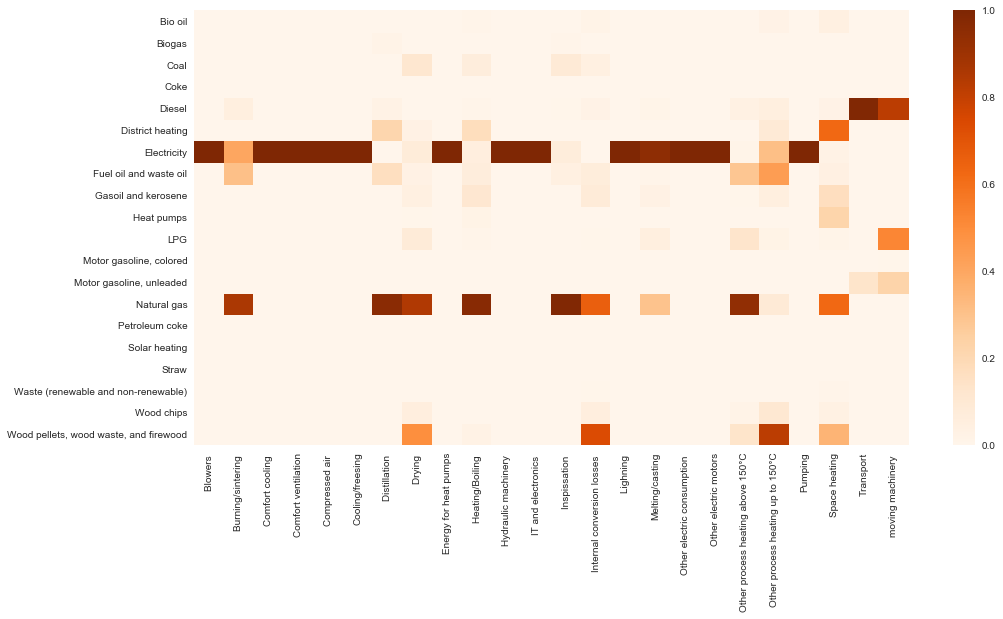

In [34]:
# First heat map NORMALIZED
from sklearn import preprocessing
import seaborn as sns
vmas_agri_normalized = preprocessing.normalize(vmas_pdouble_pivot).T
#mydatalog1p = vmas_serv_pivot.apply(np.log1p)
# --
plt.figure(figsize=(16, 8))
sns.heatmap(vmas_agri_normalized,
            xticklabels=list(vmas_psingle_pivot.index),
            yticklabels=list(vmas_psingle_pivot.columns),
            annot=False, cmap="Oranges")
plt.show()


If we want to change the colour scale:
http://matplotlib.org/examples/color/colormaps_reference.html

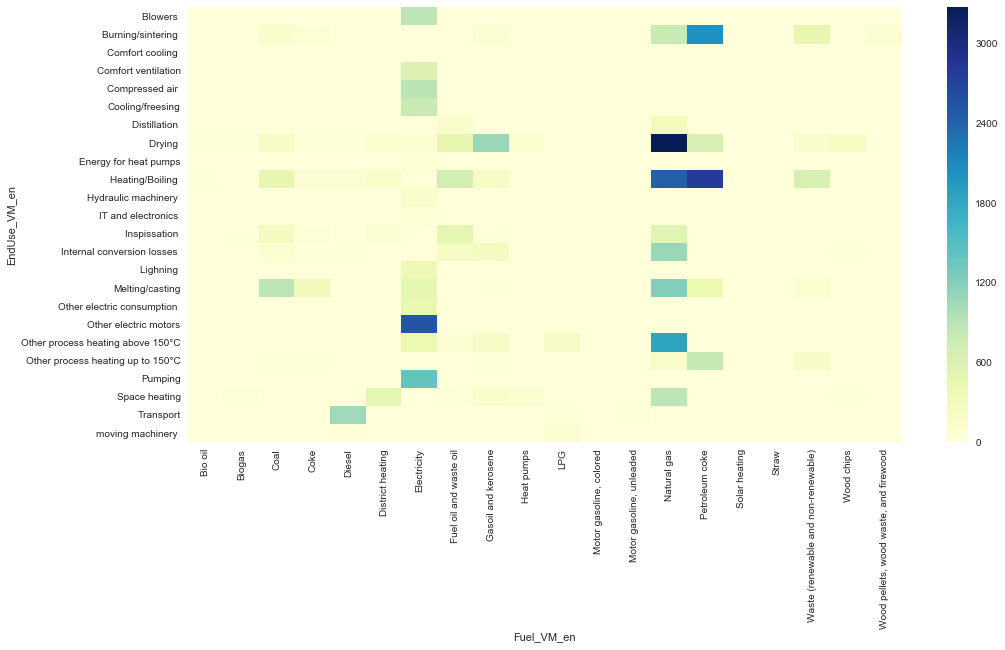

In [35]:
# Second heat map NORMAL

plt.figure(figsize=(16, 8))
sns.heatmap(vmas_ptriple_pivot, annot=False, cmap="YlGnBu")
plt.show()

In [36]:
# Third heat map LOGARITMIC WITH ADJUSTED AXIS
#mydatalog = vmas_serv_pivot.apply(np.log10)
mydatalog1p = vmas_ptriple_pivot.apply(np.log1p)
# log1p = ln_e(1+x)

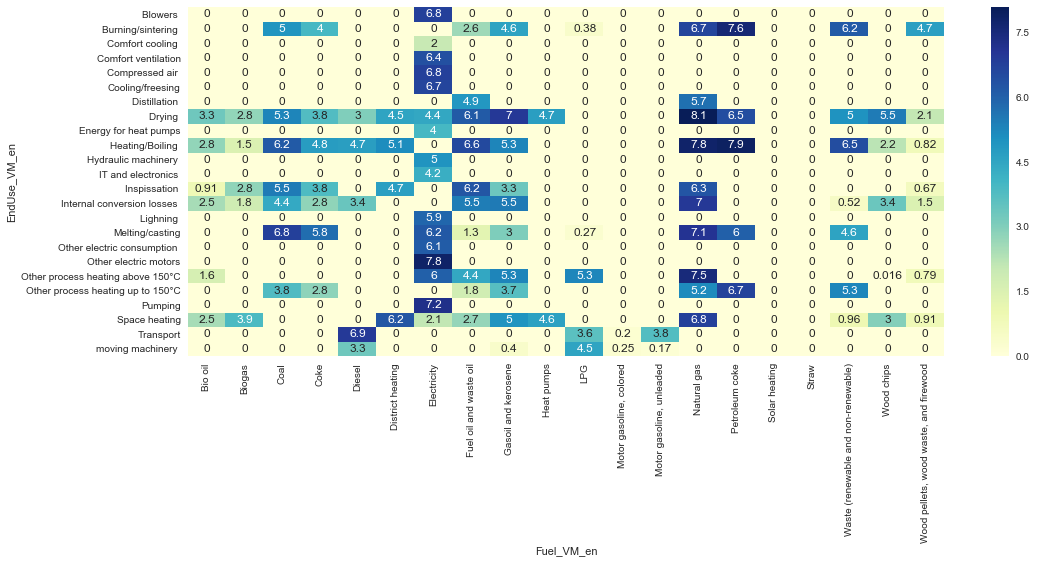

In [37]:
# Normal plot
plt.figure(figsize=(16, 8))
sns.heatmap(mydatalog1p, annot=True, cmap="YlGnBu")
#plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

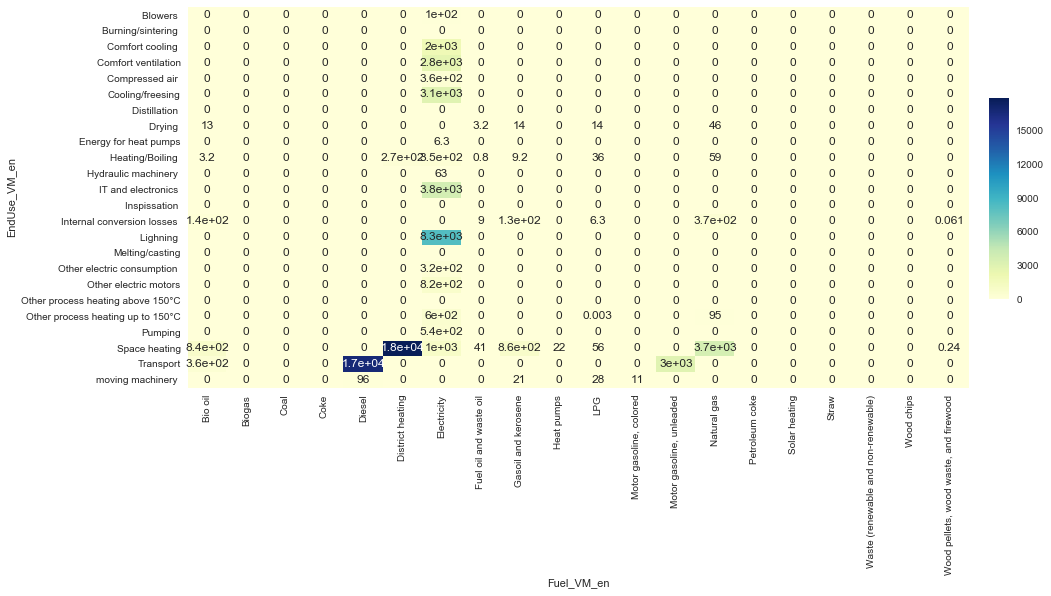

In [38]:
# plot to set axes
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
uniform_data = vmas_serv_pivot
cbar_axis = fig.add_axes([.92, .3, .02, .4])
sns.heatmap(uniform_data, ax=ax, cbar_ax=cbar_axis, annot=True, cmap="YlGnBu")

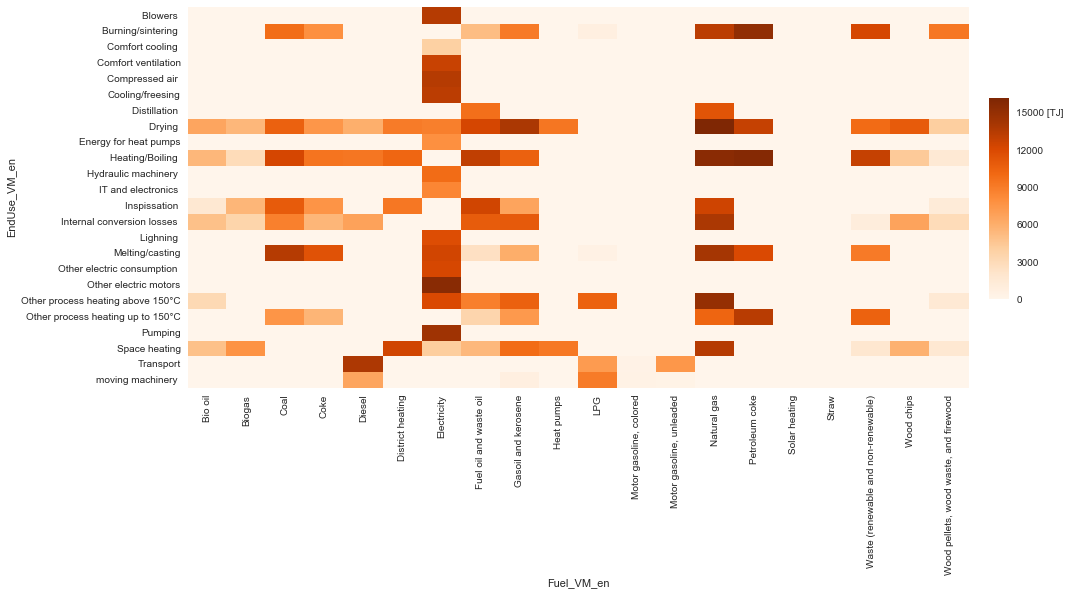

In [78]:
# DEFINITIVE PLOT
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
uniform_data = mydatalog1p
#add an axis to our plot for our cbar, tweak the numbers there to play with the sizing. 
cbar_ax = fig.add_axes([.92, .3, .02, .4])
#assign the cbar to be in that axis using the cbar_ax kw
sns.heatmap(uniform_data, ax=ax, cbar_ax=cbar_ax,  cmap="Oranges")

#hacky solution to change the highest (last) yticklabel
changed_val = cbar_axis.get_yticklabels()[-1].get_text() + " [TJ]"

#make a new list of labels with the changed value.
labels = [x.get_text() for x in cbar_axis.get_yticklabels()[:-1]] + [changed_val]

#set the yticklabels to the new labels we just created. 
cbar_ax.set_yticklabels(labels) 

### Plotting HeatMap

#### My not working application of the example heatmap

http://bokeh.pydata.org/en/latest/docs/gallery/heatmap_chart.html

In [49]:
#output_notebook()
# Try a different heat map - different problems
#hm = HeatMap(vmas_TJ, x='Fuel_VM_en', y='EndUse_VM_en',  values='TJ_per_year', stat='count')
#show(hm)

## Create HeatMap - other examples
http://bokeh.pydata.org/en/0.9.3/docs/user_guide/charts.html
http://bokeh.pydata.org/en/latest/docs/gallery/heatmap_chart.html

In [50]:
from bokeh.charts import HeatMap, output_file, show

import pandas as pd

output_file('heatmap.html')

df = pd.DataFrame(
        dict(
            apples=[4, 5, 8],
            bananas=[1, 2, 4],
            pears=[6, 5, 4],
        ),
        index=['2012', '2013', '2014']
    )

p = HeatMap(df, title='Fruits')

show(p)

http://bokeh.pydata.org/en/latest/docs/gallery/unemployment.html

# Profiles: Electricity
Danish Electricity Profiles
- Data for Denmark are downloaded from www.elforbrugspanel.dk/Pages/Rapportering.aspx (public data). There are 37 consumption categories. Helge matched the profiles to the sectors and separated it to DK-W and DK-E. (ToDo: Understand what Helge did and decide from which stage we take the data directly or redo it in our Python Script to be able to flexibly switch and further define demands and get into details / do a csv-translation file for the sectors with three numbers and our sectors to make it transparent)
- csv-file of sheet "production sectors" from Mattia to have the triple, double shift thing as a clear input - from Viegand and Magoee (ToDo)
- calculate based on the profiles and the VMAS-Data the profiles for industry

Open Questions:
- Level of Detail for Balmorel input: Real profiles or rather day-night / workday-weekend / seasonal pattern as Balmorel is taking just some hours anyway?


In [51]:
# Read the original electricity profiles

In [52]:
# Read the translation list for numbers - to sectors - to the DB07 Branchecode

In [40]:
# Read the file stating which DB07 Branchecode is which shift
shifts = pd.read_excel('input/industry_sectors_shifts.xlsx',
                       encoding='UTF8')
shifts.head()

Production  \
NaN Agriculture NaN                                                Service NaN                                                    Single   
    Code        Name                                               Code    Name                                                     Code   
    1           Farming                                            45      Repair and installation of machinery and equipm...         16   
    2           Gardening                                          46      Sale, and repair and maintenance of motor vehicles         35   
    3           Support activities and services for agriculture... 47      Wholesale                                                  36   

                                                                                                                                                                      Unnamed: 1  \
NaN Agriculture NaN                                                Service NaN                                                                                               NaN   
    Code        Name                                               Code    Name                                                                                             Name   
    1           Farming                                            45      Repair and installation of machinery and equipm...                                            Textile   
    2           Gardening                                          46      Sale, and repair and maintenance of motor vehicles  Manufacture of computers and communication equ...   
    3           Support activities and services for agriculture... 47      Wholesale                                           Manufacture of other electronic equipment, ele...   

                                                                                                                              Unnamed: 2  \
NaN Agriculture NaN                                                Service NaN                                                    Double   
    Code        Name                                               Code    Name                                                     Code   
    1           Farming                                            45      Repair and installation of machinery and equipm...          7   
    2           Gardening                                          46      Sale, and repair and maintenance of motor vehicles          8   
    3           Support activities and services for agriculture... 47      Wholesale                                                  10   

                                                                                                                                                    Unnamed: 3  \
NaN Agriculture NaN                                                Service NaN                                                                             NaN   
    Code        Name                                               Code    Name                                                                           Name   
    1           Farming                                            45      Repair and installation of machinery and equipm...                  Slaughterhouses   
    2           Gardening                                          46      Sale, and repair and maintenance of motor vehicles                    Fiskeindustri   
    3           Support activities and services for agriculture... 47      Wholesale                                           bakeries, bread factories, etc.   

                                                                                                                              Unnamed: 4  \
NaN Agriculture NaN                                                Service NaN                                                    Triple   
    Code        Name                                               Code    Name                               

In [41]:
# Read profiles from Mattia
profiles = pd.read_excel('input/finalprofiles.xlsx', 
                         sheetname='DK',
                         encoding='UTF8',
                         thousands=',',
                         decimals='.',
                         skiprows=1,
                         index_col=[0],
                         header=1)

In [43]:
# Fit headings to other VMAS data or change headings
translation = pd.read_excel('input/translation.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)
translation.head()

Branche m. numre                              Industry with numbers  \
0           Landbrug                                        Agriculture   
1           Gartneri                                       Horticulture   
2    Maskinstationer  Support activities for agricultural production...   
3  Skovbrug (020000)                                  Forestry (020000)   
4   Fiskeri (030000)                                   Fishing (030000)   

   Order                           NN Industry with numbers  \
0      1                                     01 Agriculture   
1      2                                    02 Horticulture   
2      3  03 Support activities for agricultural product...   
3      4                               04 Forestry (020000)   
4      5                                05 Fishing (030000)   

                              NN Aggregated  \
0  01 Landbrug, skovbrug, fiskeri, grus&ler   
1  01 Landbrug, skovbrug, fiskeri, grus&ler   
2  01 Landbrug, skovbrug, fiskeri, grus&ler   
3  01 Landbrug, skovbrug, fiskeri, grus&ler   
4  01 Landbrug, skovbrug, fiskeri, grus&ler   

                                     NN Aggregated.1    Numbers  
0  01 Agriculture, forestry, fishing, gravel & stone        NaN  
1  01 Agriculture, forestry, fishing, gravel & stone        NaN  
2  01 Agriculture, forestry, fishing, gravel & stone   (020000)  
3  01 Agriculture, forestry, fishing, gravel & stone   (030000)  
4  01 Agriculture, forestry, fishing, gravel & stone   (080090)

In [76]:
# Get the same column names for profiles as from the VMAS file to be able to combine the data
# This has to be done with great care later, using the right names already at the shifts-file - quick and dirty for now as it has the same order
profiles.columns = translation['Industry with numbers']
profiles.head()

Industry with numbers  Agriculture  Horticulture  \
Time                                               
2012-01-01 00:00:00       0.000114      0.000114   
2012-01-01 01:00:00       0.000114      0.000114   
2012-01-01 02:00:00       0.000160      0.000160   
2012-01-01 03:00:00       0.000162      0.000162   
2012-01-01 04:00:00       0.000162      0.000162   

Industry with numbers  Support activities for agricultural production etc.  \
Time                                                                         
2012-01-01 00:00:00                                             0.000114     
2012-01-01 01:00:00                                             0.000114     
2012-01-01 02:00:00                                             0.000160     
2012-01-01 03:00:00                                             0.000162     
2012-01-01 04:00:00                                             0.000162     

Industry with numbers  Forestry (020000)  Fishing (030000)  \
Time                                                         
2012-01-01 00:00:00             0.000114          0.000114   
2012-01-01 01:00:00             0.000114          0.000114   
2012-01-01 02:00:00             0.000160          0.000160   
2012-01-01 03:00:00             0.000162          0.000162   
2012-01-01 04:00:00             0.000162          0.000162   

Industry with numbers  Extraction of gravel and stone (080090)  \
Time                                                             
2012-01-01 00:00:00                                   0.000025   
2012-01-01 01:00:00                                   0.000025   
2012-01-01 02:00:00                                   0.000025   
2012-01-01 03:00:00                                   0.000025   
2012-01-01 04:00:00                                   0.000024   

Industry with numbers  Production of meat and meat products (100010)  \
Time                                                                   
2012-01-01 00:00:00                                         0.000045   
2012-01-01 01:00:00                                         0.000045   
2012-01-01 02:00:00                                         0.000046   
2012-01-01 03:00:00                                         0.000047   
2012-01-01 04:00:00                                         0.000048   

Industry with numbers  Processing and preserving of fish (100020)  \
Time                                                                
2012-01-01 00:00:00                                      0.000045   
2012-01-01 01:00:00                                      0.000045   
2012-01-01 02:00:00                                      0.000046   
2012-01-01 03:00:00                                      0.000047   
2012-01-01 04:00:00                                      0.000048   

Industry with numbers  Manufacture of dairy products (100030)  \
Time                                                            
2012-01-01 00:00:00                                  0.000045   
2012-01-01 01:00:00                                  0.000045   
2012-01-01 02:00:00                                  0.000046   
2012-01-01 03:00:00                                  0.000047   
2012-01-01 04:00:00                                  0.000048   

Industry with numbers  Manufacture of grain mill and bakery products (100040)  \
Time                                                                            
2012-01-01 00:00:00                                             0.000045        
2012-01-01 01:00:00                                             0.000045        
2012-01-01 02:00:00                                             0.000046        
2012-01-01 03:00:00                                             0.000047        
2012-01-01 04:00:00                                             0.000048        

Industry with numbers            ...             Retail sale (470000)  \
Time                             ...                                    
2012-01-01 00:00:00            

### Combine profiles with yearly sums per industrial sector (electricity)

In [76]:
vmas_TJ

Industry_VM_en_agg             Industry_VM_en  \
0            Agriculture                   Farming    
1            Agriculture                   Farming    
2            Agriculture                   Farming    
3            Agriculture                   Farming    
4            Agriculture                   Farming    
5            Agriculture                   Farming    
6            Agriculture                   Farming    
7            Agriculture                   Farming    
8            Agriculture                   Farming    
9            Agriculture                   Farming    
10           Agriculture                   Farming    
11           Agriculture                   Farming    
12           Agriculture                   Farming    
13           Agriculture                   Farming    
14           Agriculture                   Farming    
15           Agriculture                   Farming    
16           Agriculture                   Farming    
17           Agriculture                   Farming    
18           Agriculture                   Farming    
19           Agriculture                   Farming    
20           Agriculture                   Farming    
21           Agriculture                   Farming    
22           Agriculture                   Farming    
23           Agriculture                   Farming    
24           Agriculture                   Farming    
25           Agriculture                   Farming    
26           Agriculture                   Farming    
27           Agriculture                   Farming    
28           Agriculture                   Farming    
29           Agriculture                   Farming    
...                  ...                        ...   
27330            Service  Other service activities    
27331            Service  Other service activities    
27332            Service  Other service activities    
27333            Service  Other service activities    
27334            Service  Other service activities    
27335            Service  Other service activities    
27336            Service  Other service activities    
27337            Service  Other service activities    
27338            Service  Other service activities    
27339            Service  Other service activities    
27340            Service  Other service activities    
27341            Service  Other service activities    
27342            Service  Other service activities    
27343            Service  Other service activities    
27344            Service  Other service activities    
27345            Service  Other service activities    
27346            Service  Other service activities    
27347            Service  Other service activities    
27348            Service  Other service activities    
27349            Service  Other service activities    
27350            Service  Other service activities    
27351            Service  Other service activities    
27352            Service  Other service activities    
27353            Service  Other service activities    
27354            Service  Other service activities    
27355            Service  Other service activities    
27356            Service  Other service activities    
27357            Service  Other service activities    
27358            Service  Other service activities    
27359            Service  Other service activities    

                  EndUse_VM_en_agg                       EndUse_VM_en  \
0      Internal conversion losses         Internal conversion losses    
1                  Process Heating                   Heating/Boiling    
2                  Process Heating                            Drying    
3                  Process Heating                      Inspissation    
4                  Process Heating                      Distillation    
5                  Process Heating                 Burning/sintering    
6                  Process Heating                    Melting/casting   
7          

In [77]:
# Sum up the GJ Electricity of each Industry NOW IN MwH
# PJ to MWh: 1 MWh = 3.6*10^6 PJ so if we have PJ it will be MWh= PJ/3.6*10^6
industry_TJ = pd.DataFrame(vmas_TJ[vmas["Fuel_TIMES_en"] == '17 Electricity'].
                           groupby(['Industry_VM_en'])['TJ_per_year'].sum()/0.0036)
industry_TJ.columns = ['MWh_per_year']
industry_MWh = industry_TJ


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [64]:
industry_MWh.head()

MWh_per_year
Industry_VM_en                                              
Arts, entertainment and recreation activities   2.158281e+05
Extraction of gravel and stone                  9.343556e+04
Farming                                         1.514674e+06
Financial and insurance                         1.924269e+05
Fishing                                         6.466361e+04

In [72]:
# For multiplication, the values should be formatted as a series (example b = pd.Series([0,2,3], index=['col1','col2','col3']))
industry_MWh_mul = pd.Series(industry_MWh.MWh_per_year)
industry_MWh_mul.head()

Industry_VM_en
Arts, entertainment and recreation activities     2.158281e+05
Extraction of gravel and stone                    9.343556e+04
Farming                                           1.514674e+06
Financial and insurance                           1.924269e+05
Fishing                                           6.466361e+04
Name: MWh_per_year, dtype: float64

In [74]:
# multiplication: each column of the profiles multiplied with the respective yearly energy usage of the industry sector
# the index of the industry_GJ has to match to the columns names of the profiles
profiles_MWh = profiles.multiply(industry_MWh_mul,axis=1)

In [73]:
# profiles relative
profiles.head(2)

NN Industry with numbers  01 Agriculture  02 Horticulture  \
Time                                                        
2012-01-01 00:00:00             0.000114         0.000114   
2012-01-01 01:00:00             0.000114         0.000114   

NN Industry with numbers  03 Support activities for agricultural production etc.  \
Time                                                                               
2012-01-01 00:00:00                                                0.000114        
2012-01-01 01:00:00                                                0.000114        

NN Industry with numbers  04 Forestry (020000)  05 Fishing (030000)  \
Time                                                                  
2012-01-01 00:00:00                   0.000114             0.000114   
2012-01-01 01:00:00                   0.000114             0.000114   

NN Industry with numbers  06 Extraction of gravel and stone (080090)  \
Time                                                                   
2012-01-01 00:00:00                                         0.000025   
2012-01-01 01:00:00                                         0.000025   

NN Industry with numbers  07 Production of meat and meat products (100010)  \
Time                                                                         
2012-01-01 00:00:00                                               0.000045   
2012-01-01 01:00:00                                               0.000045   

NN Industry with numbers  08 Processing and preserving of fish (100020)  \
Time                                                                      
2012-01-01 00:00:00                                            0.000045   
2012-01-01 01:00:00                                            0.000045   

NN Industry with numbers  09 Manufacture of dairy products (100030)  \
Time                                                                  
2012-01-01 00:00:00                                        0.000045   
2012-01-01 01:00:00                                        0.000045   

NN Industry with numbers  10 Manufacture of grain mill and bakery products (100040)  \
Time                                                                                  
2012-01-01 00:00:00                                                0.000045           
2012-01-01 01:00:00                                                0.000045           

NN Industry with numbers             ...               \
Time                                 ...                
2012-01-01 00:00:00                  ...                
2012-01-01 01:00:00                  ...                

NN Industry with numbers  48 Retail sale (470000)  \
Time                                                
2012-01-01 00:00:00                      0.000052   
2012-01-01 01:00:00                      0.000052   

NN Industry with numbers  49 Hotels and similar accommodation (550000)  \
Time                                                                     
2012-01-01 00:00:00                                           0.000077   
2012-01-01 01:00:00                                           0.000077   

NN Industry with numbers  50 Restaurants (560000)  \
Time                                                
2012-01-01 00:00:00                      0.000077   
2012-01-01 01:00:00                      0.000077   

NN Industry with numbers  51 Information service activities and Telecommunications  \
Time                                                                                 
2012-01-01 00:00:00                                                0.000094          
2012-01-01 01:00:00                                                0.000094          

NN Industry with numbers  52 Financial and insurance  \
Time                                                   
2012-01-01 00:00:00                         0.000085   
2012-01-01 01:00:00                         0.000085   

NN Industry with numbers  53 Buying and selling of real estate, and Rentin

In [75]:
# profiles absolute
profiles_MWh.head(2)

01 Agriculture  02 Horticulture  \
Time                                                   
2012-01-01 00:00:00             NaN              NaN   
2012-01-01 01:00:00             NaN              NaN   

                     03 Support activities for agricultural production etc.  \
Time                                                                          
2012-01-01 00:00:00                                                NaN        
2012-01-01 01:00:00                                                NaN        

                     04 Forestry (020000)  05 Fishing (030000)  \
Time                                                             
2012-01-01 00:00:00                   NaN                  NaN   
2012-01-01 01:00:00                   NaN                  NaN   

                     06 Extraction of gravel and stone (080090)  \
Time                                                              
2012-01-01 00:00:00                                         NaN   
2012-01-01 01:00:00                                         NaN   

                     07 Production of meat and meat products (100010)  \
Time                                                                    
2012-01-01 00:00:00                                               NaN   
2012-01-01 01:00:00                                               NaN   

                     08 Processing and preserving of fish (100020)  \
Time                                                                 
2012-01-01 00:00:00                                            NaN   
2012-01-01 01:00:00                                            NaN   

                     09 Manufacture of dairy products (100030)  \
Time                                                             
2012-01-01 00:00:00                                        NaN   
2012-01-01 01:00:00                                        NaN   

                     10 Manufacture of grain mill and bakery products (100040)  \
Time                                                                             
2012-01-01 00:00:00                                                NaN           
2012-01-01 01:00:00                                                NaN           

                        ...      Production of meat and meat products   \
Time                    ...                                              
2012-01-01 00:00:00     ...                                        NaN   
2012-01-01 01:00:00     ...                                        NaN   

                     Real estate activities   \
Time                                           
2012-01-01 00:00:00                      NaN   
2012-01-01 01:00:00                      NaN   

                     Repair and installation of machinery and equipment   \
Time                                                                       
2012-01-01 00:00:00                                                NaN     
2012-01-01 01:00:00                                                NaN     

                     Restaurants   Retail sale   \
Time                                              
2012-01-01 00:00:00           NaN           NaN   
2012-01-01 01:00:00           NaN           NaN   

                     Sale, and repair and maintenance of motor vehicles   \
Time                                                                       
2012-01-01 00:00:00                                                NaN     
2012-01-01 01:00:00                                                NaN     

                     Sugar refineries   \
Time                                     
2012-01-01 00:00:00                NaN   
2012-01-01 01:00:00                NaN   

                     Support activities and services for agriculture and hunting   \
Time                                                                                
2012-01-01 00:00:00                                                NaN              
2012-01-01 01:00:00                             

In [50]:
profiles_MWh.index.names

FrozenList(['Time'])

In [51]:
# Check: sum up per column (industry) and compare to the yearly values
TJ_per_year = pd.DataFrame(profiles_MWh.sum(axis = 0))
TJ_per_year.head()

0
01 Agriculture                                      0.0
02 Horticulture                                     0.0
03 Support activities for agricultural producti...  0.0
04 Forestry (020000)                                0.0
05 Fishing (030000)                                 0.0

In [114]:
# Check sum per row, so per hour with industrial profile
MWh_per_hour = pd.DataFrame(profiles_MWh.sum(axis = 1))

In [1]:
MWh_per_hour.head()

NameError: name 'MWh_per_hour' is not defined

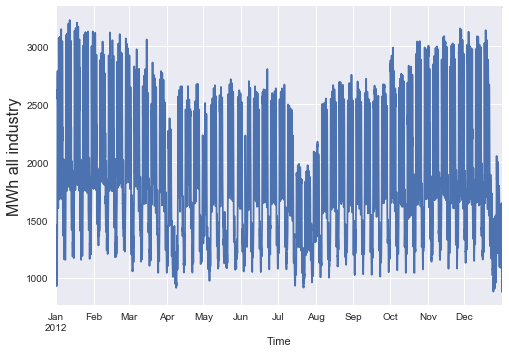

In [115]:
# Plot the summed industrial profile
fig = plt.figure()
MWh_per_hour.plot()
plt.ylabel('MWh all industry', fontsize=16)
plt.legend(prop={'size':0.03},loc='best')
# fig.savefig('profile_industry_year.png')

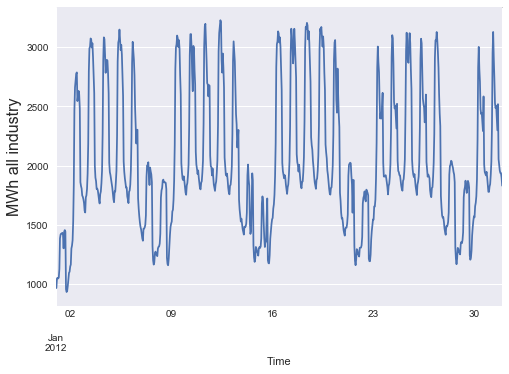

In [116]:
# Just for month
month1_all = MWh_per_hour['2012-1-1':'2012-1-31']
fig = plt.figure()
month1_all.plot()
plt.ylabel('MWh all industry', fontsize=16)
plt.legend(prop={'size':0.03},loc='best')

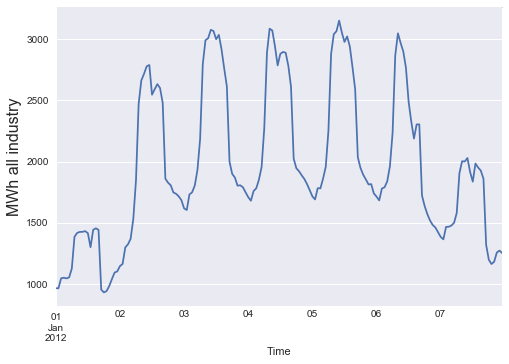

In [128]:
# Just for one week: week 1
week1_all = MWh_per_hour['2012-1-1':'2012-1-7']
fig = plt.figure()
week1_all.plot()
plt.ylabel('MWh all industry', fontsize=16)
plt.legend(prop={'size':0.03},loc='best')

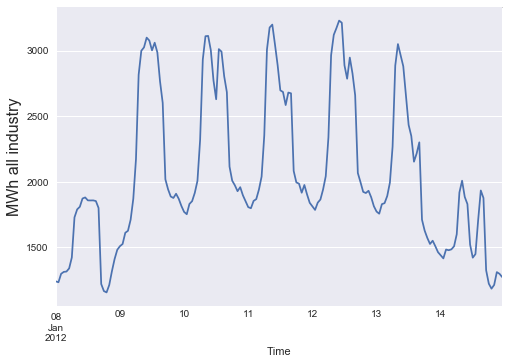

In [129]:
# Just for one week: week 2
week2_all = MWh_per_hour['2012-1-8':'2012-1-14']
fig = plt.figure()
week2_all.plot()
plt.ylabel('MWh all industry', fontsize=16)
plt.legend(prop={'size':0.03},loc='best')

In [130]:
# Cumulate the energy demand per hour as a preparation for a cumulated plot per industry
# should be done for aggregated industry as well
# (we do not have it for end-use yet)
MWh_cumulated = pd.DataFrame(profiles_MWh.cumsum(axis = 1))

In [132]:
MWh_cumulated.head()

Arts, entertainment and recreation activities   \
Time                                                                  
2012-01-01 00:00:00                                       14.359685   
2012-01-01 01:00:00                                       14.359685   
2012-01-01 02:00:00                                       14.523870   
2012-01-01 03:00:00                                       14.608241   
2012-01-01 04:00:00                                       14.498343   

                     Extraction of gravel and stone    Farming   \
Time                                                              
2012-01-01 00:00:00                       16.738856  190.109169   
2012-01-01 01:00:00                       16.738856  190.109169   
2012-01-01 02:00:00                       16.884437  258.671975   
2012-01-01 03:00:00                       16.903699  262.595032   
2012-01-01 04:00:00                       16.778557  261.722400   

                     Financial and insurance      Fishing    Forestry  \
Time                                                                    
2012-01-01 00:00:00                206.544708  213.946135  215.715821   
2012-01-01 01:00:00                206.544708  213.946135  215.715821   
2012-01-01 02:00:00                275.035238  285.357494  287.825552   
2012-01-01 03:00:00                278.925462  289.414377  291.922284   
2012-01-01 04:00:00                278.077821  288.534825  291.035101   

                      Gardening  Hotels and similar accommodation   \
Time                                                                 
2012-01-01 00:00:00  241.087892                         261.197162   
2012-01-01 01:00:00  241.087892                         261.197162   
2012-01-01 02:00:00  323.210217                         342.738634   
2012-01-01 03:00:00  327.878254                         346.861705   
2012-01-01 04:00:00  326.881679                         344.811285   

                     Information and communication   \
Time                                                  
2012-01-01 00:00:00                      365.341096   
2012-01-01 01:00:00                      365.341096   
2012-01-01 02:00:00                      446.525288   
2012-01-01 03:00:00                      450.788609   
2012-01-01 04:00:00                      449.037869   

                     Knowledge-based services      ...       \
Time                                               ...        
2012-01-01 00:00:00                 387.463642     ...        
2012-01-01 01:00:00                 387.463642     ...        
2012-01-01 02:00:00                 468.746577     ...        
2012-01-01 03:00:00                 472.971407     ...        
2012-01-01 04:00:00                 471.676523     ...        

                     Production of meat and meat products   \
Time                                                         
2012-01-01 00:00:00                             694.980253   
2012-01-01 01:00:00                             694.980253   
2012-01-01 02:00:00                             779.696063   
2012-01-01 03:00:00                             787.431381   
2012-01-01 04:00:00                             788.172203   

                     Real estate activities   \
Time                                           
2012-01-01 00:00:00               709.070407   
2012-01-01 01:00:00               709.070407   
2012-01-01 02:00:00               793.724254   
2012-01-01 03:00:00               801.431425   
2012-01-01 04:00:00               802.193672   

                     Repair and installation of machinery and equipment   \
Time                                                                       
2012-01-01 00:00:00                                         710.877366     
2012-01-01 01:00:00                                         710.877366     
2012-01-01 02:00:00                                         795.524647     
2012-01-01 03:00:00                                         803.225227

In [140]:
from bokeh.charts import Area, show, vplot, output_file, defaults
area = Area(week1_cum)
#show(area)

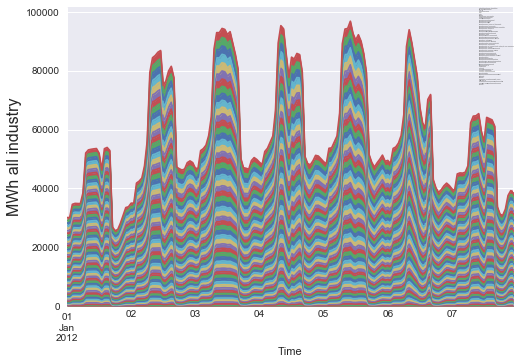

In [143]:
# Plot the cumulated
week1_cum = MWh_cumulated['2012-1-1':'2012-1-7']
fig = plt.figure()
week1_cum.plot.area()
plt.ylabel('MWh all industry', fontsize=16)
plt.legend(prop={'size':0.03},loc='best')



In [141]:
# Sort out the Agriculture ones (the first five)
profiles_MWh_no_agri = profiles_MWh.iloc[:,5:57]

# make cumulated sum agaion without agriculture
MWh_cum_no_agri = pd.DataFrame(profiles_MWh_no_agri.cumsum(axis = 1))

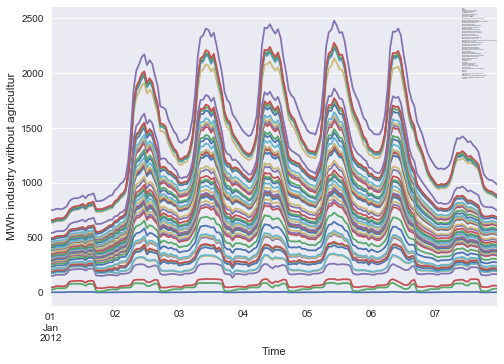

In [142]:
# Plot the cumulated, one week, without agriculture
week1_cum_no_agri = MWh_cum_no_agri['2012-1-1':'2012-1-7']
fig = plt.figure()
week1_cum_no_agri.plot()
plt.ylabel('MWh industry without agricultur', fontsize=12)
plt.legend(prop={'size':0.03},loc='best')

In [66]:
# Save all the profiles in the store.h5

store = pd.HDFStore('store.h5')

#store['profiles_MWh'] = profiles_MWh
#store['MWh_cumulated'] = MWh_cumulated
store['vmas'] = vmas
store['vmas_TJ'] = vmas_TJ
store.close()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['Industry_VM_en_agg', 'Industry_VM_en', 'EndUse_VM_en_agg', 'EndUse_VM_en', 'Fuel_VM_en', 'Fuel_VM_en_agg', 'color']]

  exec(code_obj, self.user_global_ns, self.user_ns)


# Profiles: Heat
Ideas:
- Compare monthly gas consumption values from Dansk Gas Distribution for industrial sectors with electricity profiles from the same sectors
- Look at gas consumption of different companies of sectors - variations?
- use demandlib
- use Åsas heat demand regression model
- take the one / double / tripple shift as the basis for heat demand pattern
- Go for Seasonal pattern / weekly pattern?
- Go for day-night difference / working day - non working day, stay constant otherwise
- get gas demand at measuring points - substract the heat demand for residential according to Varmestabi formular
- heat profile pattern in TIMES? ask Olex, Kenneth, Kristoffer
- District heating profiles in Balmorel taken from RAMSES - ask Helge, see Balmorel documentation

Open Questions
- how exact do we need the process heat demand profiles?


# Geo-location

In [ ]:
production = pd.read_csv('input/39260344_69581_20151007114756_PRODUKTIONSENHEDER.csv',
                         encoding='UTF8',
                         header=0,
                         dtype={'hovedbranche_kode': np.int64})

In [ ]:
companies = pd.read_csv('input/39260344_69581_20151007114756_VIRKSOMHEDER.csv',
                        encoding='UTF8',
                        header=0)

In [ ]:
production.loc[1,['hovedbranche_kode','hovedbranche_tekst']]

In [ ]:
{‘a’: np.float64, ‘b’: np.int32}

In [ ]:
production.info()

# Output for Data Analysis
- check if bottom-up data fits to top-down data, the overall energy statistics of Denmark

# Output for Balmorel
Open question:
- What do we need? Absolute electricity and heat demand (3 different ones?) per region - Demand profiles for electricity and heat
- Which regions?